# References
## McCurdy and Hamm 1994a
* Pair of MNs in the RC circuit: one is stimulated by injecting pulses of depolarizing current of 0.5 ms, ca. 7 Hz; Postsynaptic responses are recorded on the second impaled MN.
* Rostrocaudal distributions of recurrent inhibitory post-synaptic potentials amplitudes were obtained from pairs of motoneurons (Figure 3A). Amplitudes were determined from the difference between baseline level of activity in the resting membrane taken from the prestimulus period and the peak recurrent inhibitory post-synaptic potentials amplitude. This result obtained from all motoneurons, regardless of muscle innervated, but it is useful as an overall behavior.
* RIPSPs inversely correlated with distance between motoneurons (Kendall Tau correlation method, $\tau$=0.154, P=0.028 for MG)
* The distance that separated the 180 pairs of motoneurons measured ranged form 86 $\mu$m to 4.7 mm.
* Different mean value of significant recurrent inhibitory post-synaptic potentials of motoneurons in all pairs depending on whether they are distant or not. This classification is based on the boundary value of 1.0 mm, even though it is a debatable value, as discussed by the authors.
* Amplitudes and durations for this sample are comparable with those found by Hamm et al. (1987a).

## Uchiyama et al. (2003a)
* Number of Renshaw cells associated with the medial gastrocnemius $\alpha$ motoneuron pool is arbitrarily assumed to be 300, but it is not too far away from what has been studied in the literature.
* Topographic distribution according to a gaussian centered in the motoneuron and with standar deviation of 1/6 mm for motoneurons and 3.5/3 mm for Renshaw cells.

# Parameters adjusted
* Supposedly, the probability of connections and motoneuron conductances on Renshaw cells are the only parameters to be adjusted.

# Considerations
* The stimulation rate used by McCurdy and Hamm (1994a) does not allow for the motoneuron-Renshaw cell synapse to recover from the post-synaptic depression described in Hultborn and Pierrot-Deseiligny (1979). Therefore, amplitudes reported are probably underestimated.
* The distances considered in the simulations included the whole range available whithin 0 to 4.7 mm. Furthermore, only 180 pairs, randomly choosed, were considered. These made the simulation simpler and faster.
* For now, I am using a Renshaw cell density of 300 cells per 7 mm. I could change this density later to something similar to what was described in Cisi and Kohn (2008). The value of 7 mm used here is the length of the medial gastrocnemius neuronal column in the cat (it was 10 mm in Cisi work).

In [10]:
import sys
sys.path.insert(0, '..')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.interpolate import UnivariateSpline

from Configuration import Configuration
from MotorUnitPoolOpt import MotorUnitPool
from InterneuronPoolOpt import InterneuronPool
from NeuralTract import NeuralTract

In [11]:
def simulator(numberS, numberFR, numberFF, numberRC, MNi, Parametrization, MNRCdecay, RCMNdecay, posMN, posRC):

    conf = Configuration('confuchiyama.rmto')

    # Number of cells
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-S')[0][0]
    conf.confArray['f1'][idx] = numberS
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-FR')[0][0]
    conf.confArray['f1'][idx] = numberFR
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-FF')[0][0]
    conf.confArray['f1'][idx] = numberFF
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    
    # Duration of simulation
    conf.simDuration_ms = 40
    
    if Parametrization == 'old':
        from SynapsesFactory import SynapsesFactory
        # Parameters from java
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.3
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.24
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.17
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.3

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 64.77885
        conf.confArray['f2'][idx] = 64.77885
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 285
        conf.confArray['f2'][idx] = 285
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 200
        conf.confArray['f2'][idx] = 200
        
    elif Parametrization == 'new':
        from SynapsesFactory import SynapsesFactory
        # Parameters from Python
        ## Threshold (makes a rheobase of 1.25-3.75 nA)
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 5
        conf.confArray['f2'][idx] = 15
        
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 25
        conf.confArray['f2'][idx] = 25
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 242
        conf.confArray['f2'][idx] = 242
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 760
        conf.confArray['f2'][idx] = 760
        
    elif Parametrization == 'final':
        from SynapsesFactoryRenshaw import SynapsesFactory
        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.13
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 45
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 140
        
        # Threshold
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 18.9089
        conf.confArray['f2'][idx] = 18.9089

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 27
        conf.confArray['f2'][idx] = 27
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 218.2168
        conf.confArray['f2'][idx] = 218.2168
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 7000
        conf.confArray['f2'][idx] = 7000

        # Ks
        idx = np.where(conf.confArray['f0']=='gmax_Kf:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 3300
        idx = np.where(conf.confArray['f0']=='gmax_Ks:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 2300000
        idx = np.where(conf.confArray['f0']=='beta_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.02
        idx = np.where(conf.confArray['f0']=='alpha_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.004
        idx = np.where(conf.confArray['f0']=='alpha_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='beta_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.5
        
        ## Connectivity, set to ensure neurons are connected properly
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        
        # Decay factors
        idx = np.where(conf.confArray['f0']=='dec:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
    
    pools = dict()
    pools[0] = MotorUnitPool(conf, 'MG')
    pools[1] = InterneuronPool(conf, 'RC', 'ext')
    
#     import pdb; pdb.set_trace()
    Syn = SynapsesFactory(conf, pools)

    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

    MN_mV = np.zeros((pools[0].MUnumber, len(t)))
    RC_mV = np.zeros((pools[1].Nnumber, len(t)))
    for i in xrange(0, len(t)):
        # stimulus to soma of MNi
        if t[i]>10 and t[i]<10.5:
            pools[0].iInjected[2*MNi+1] = 50
        else:
            pools[0].iInjected[2*MNi+1] = 0
        pools[0].atualizeMotorUnitPool(t[i]) # MN pool
        pools[2].atualizePool(t[i]) # RC synaptic Noise
        pools[1].atualizeInterneuronPool(t[i]) # RC pool
        for j in xrange(pools[0].MUnumber):
            MN_mV[j, i] = pools[0].v_mV[2*j+1]
        for j in xrange(pools[1].Nnumber):
            RC_mV[j, i] = pools[1].v_mV[j]

    pools[0].listSpikes()
    pools[1].listSpikes()
    
    positions = []
    for i in range(pools[0].MUnumber):
        positions.append(pools[0].unit[i].position_mm)
    
    return MN_mV, RC_mV, t, positions

In [19]:
nS = 4
nFR = 4
nFF = 8
nRC = 16
nMN = nS+nFR+nFF
params = 'final'

declinefactor_MN = 1/6.0
declinefactor_RC = 3.5/3
# Values necessary to simulate the current quantities of neurons, but maintaing the density
MNposition = 0.37
RCposition = 0.37

boundary = 4.7
RIPSPs = []
distances = []

MNi = 8
MNsignal, RCsignal, t, positions = simulator(nS, nFR, nFF, nRC, MNi, params, declinefactor_MN, declinefactor_RC, MNposition, RCposition)

peaks = [min(MNsignal[y,]) for y in range(MNsignal.shape[0])]
for j in range(nMN):
    # Ignore the MN stimulated
    if j == MNi:
        continue
    distance = positions[j] - positions[MNi]
    # Ignore recordings out of the boundary
    if abs(distance)>boundary:
        continue
    distances.append(distance)
    RIPSPs.append(peaks[j])

Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 78 synapses were built
Synaptic Noise on RC_ext built
All the 16 synaptic noises were built


<IPython.core.display.Javascript object>


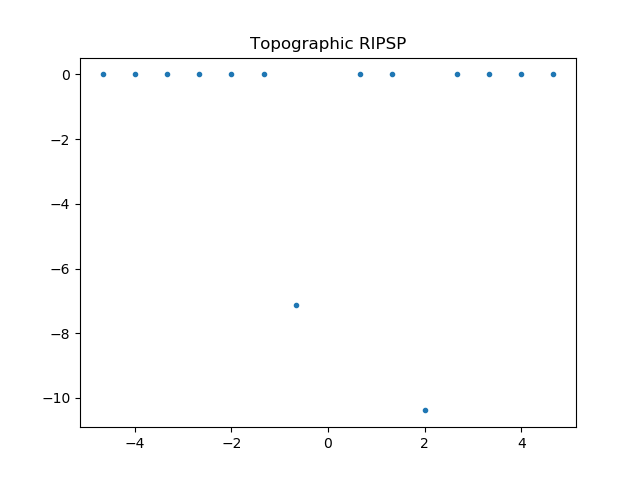

In [20]:
plt.figure()
plt.plot(distances, RIPSPs, '.')
plt.title('Topographic RIPSP')
plt.show()

<IPython.core.display.Javascript object>


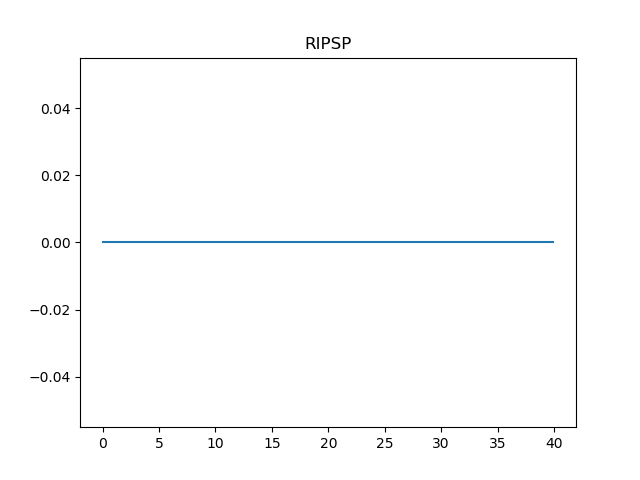

0.0


<IPython.core.display.Javascript object>


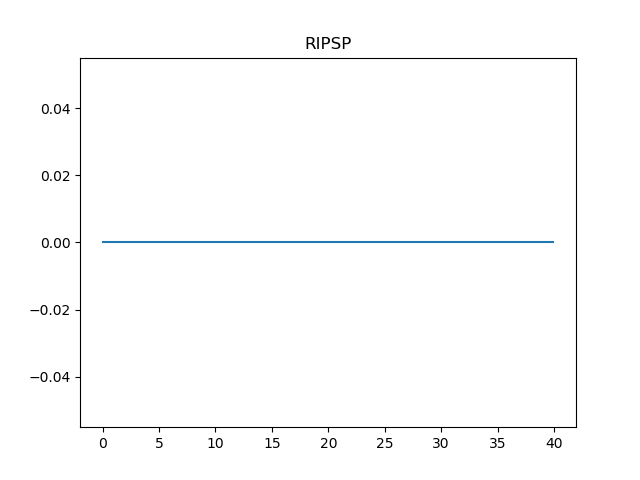

0.6666666666666666


<IPython.core.display.Javascript object>


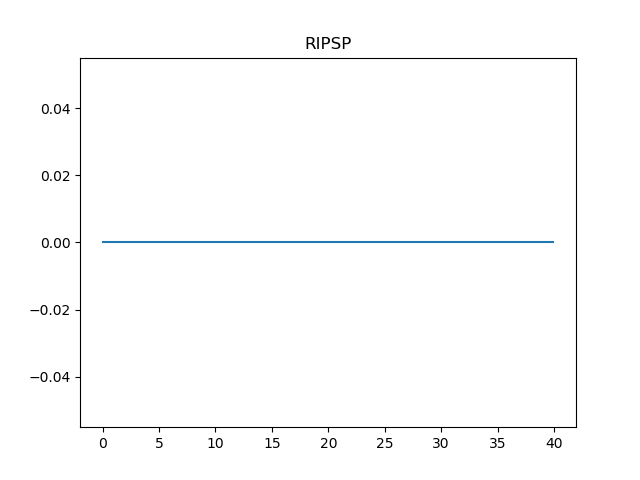

1.3333333333333333


<IPython.core.display.Javascript object>


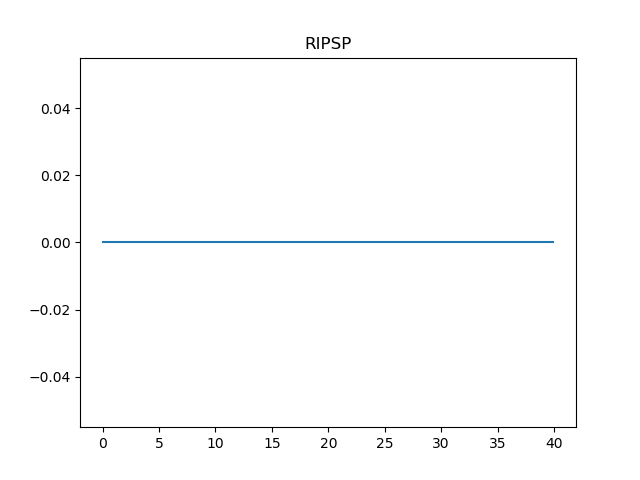

2.0


<IPython.core.display.Javascript object>


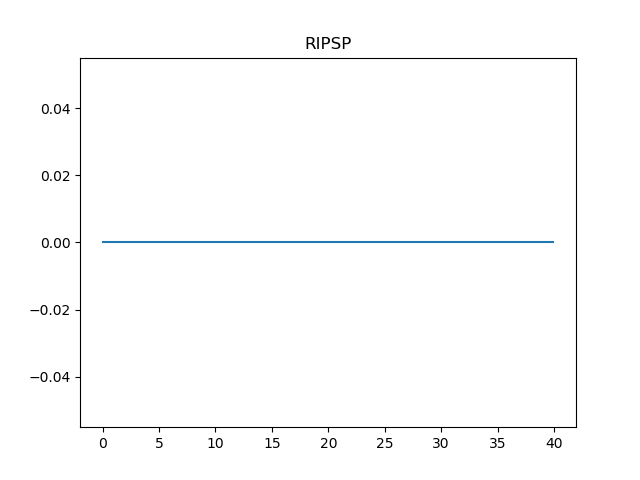

2.6666666666666665


<IPython.core.display.Javascript object>


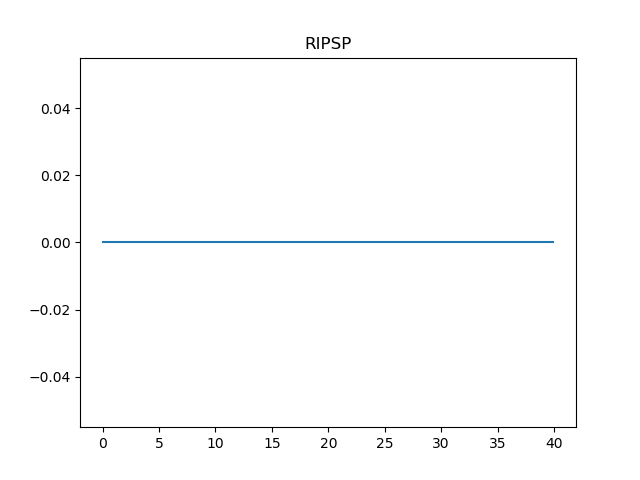

3.333333333333333


<IPython.core.display.Javascript object>


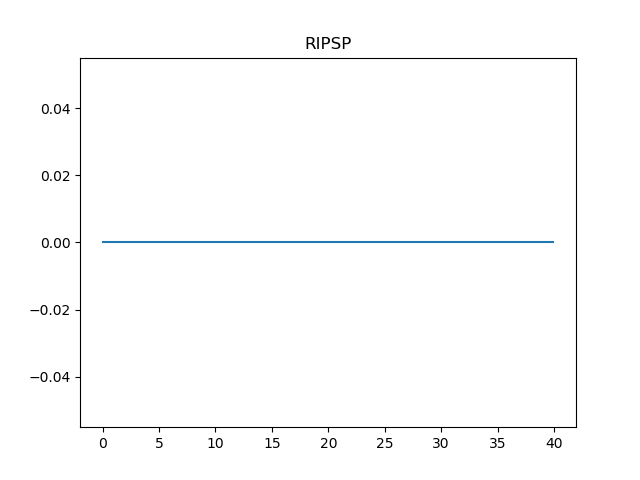

4.0


<IPython.core.display.Javascript object>


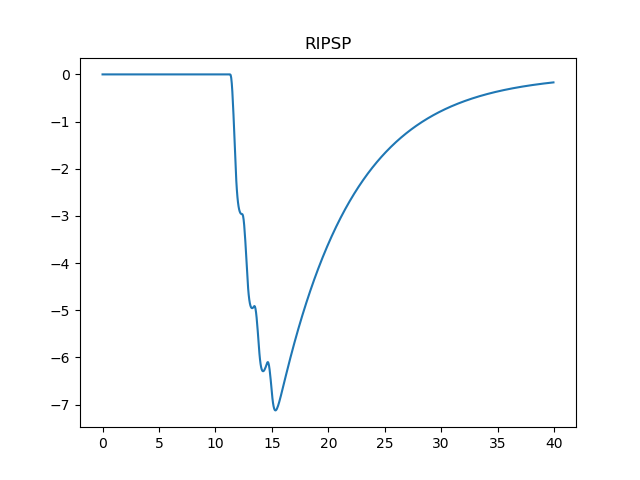

4.666666666666666


<IPython.core.display.Javascript object>


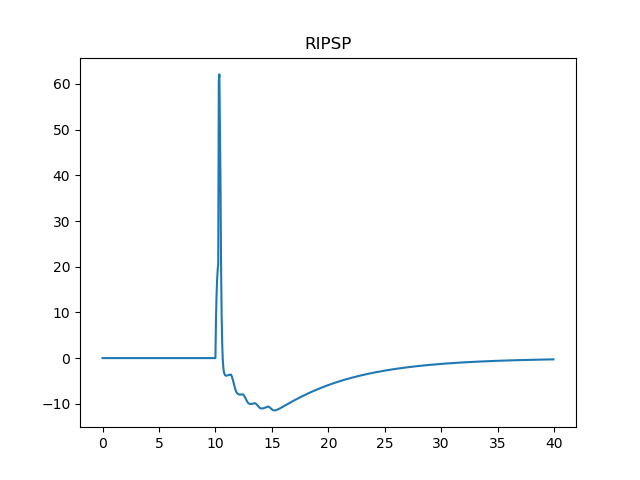

5.333333333333333


<IPython.core.display.Javascript object>


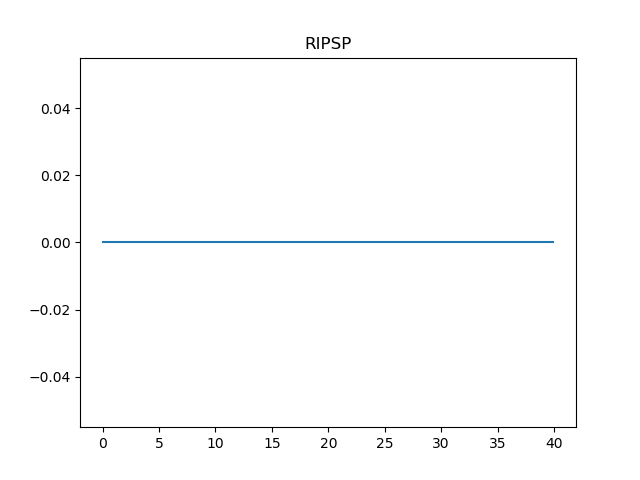

6.0


<IPython.core.display.Javascript object>


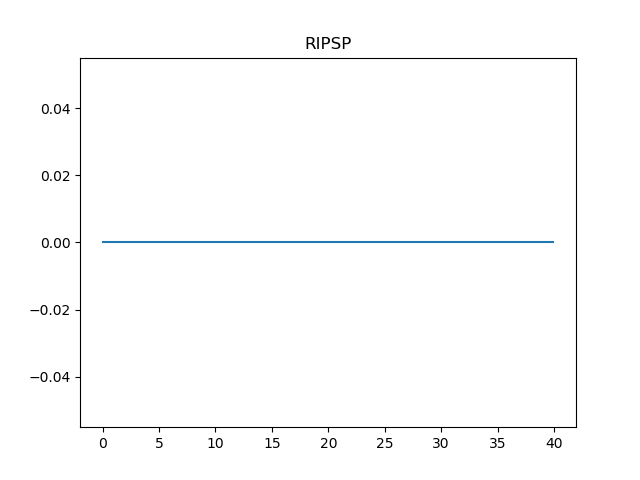

6.666666666666666


<IPython.core.display.Javascript object>


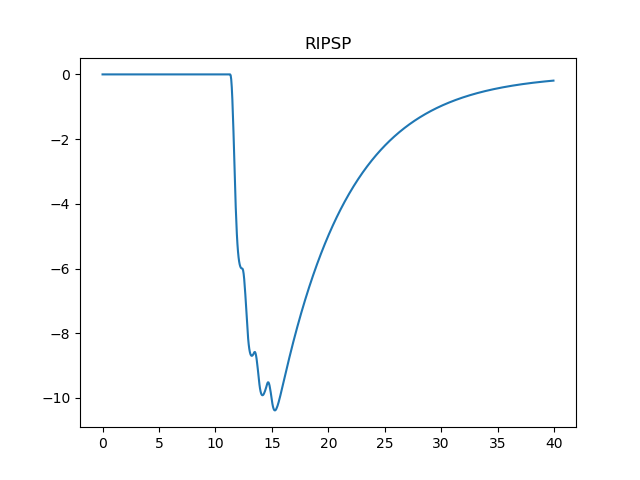

7.333333333333333


<IPython.core.display.Javascript object>


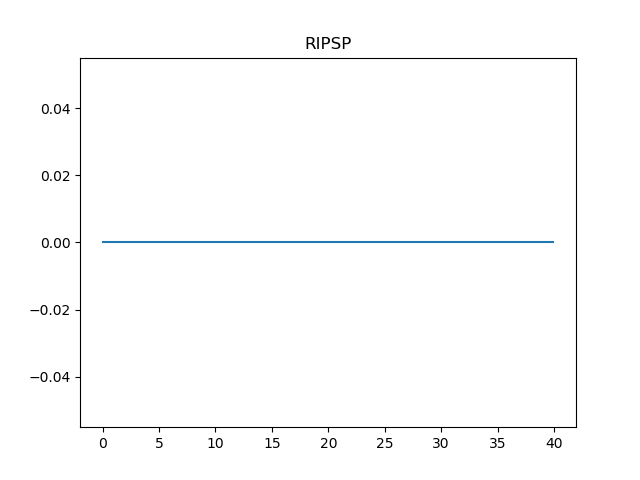

8.0


<IPython.core.display.Javascript object>


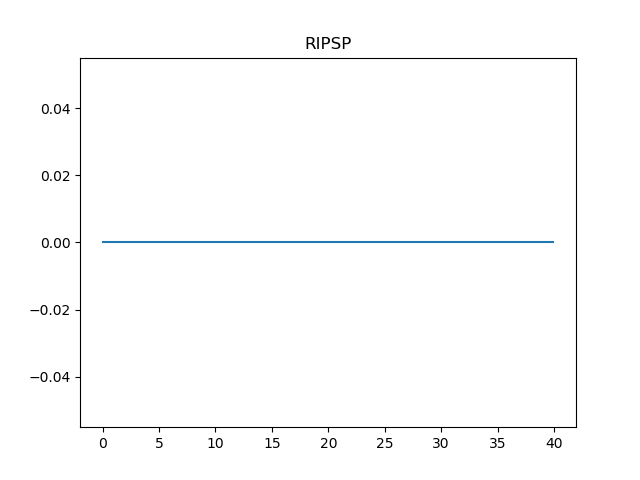

8.666666666666666


<IPython.core.display.Javascript object>


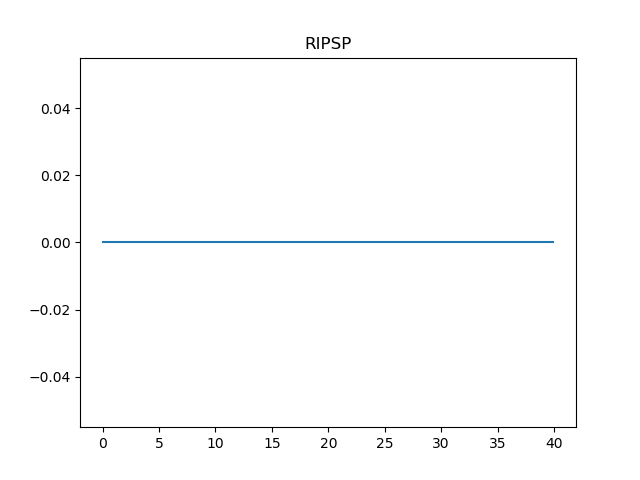

9.333333333333332


<IPython.core.display.Javascript object>


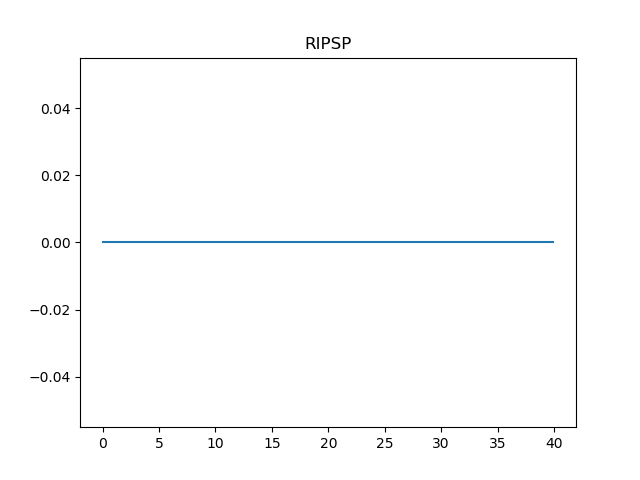

10.0


In [21]:
for i in xrange(nMN):
        plt.figure()
        print positions[i]
        plt.plot(t, MNsignal[i,])
        plt.title('RIPSP')
        plt.show()

In [22]:
nS = 75
nFR = 75
nFF = 150
nRC = 300
nMN = nS+nFR+nFF
MNidx = range(nMN)
params = 'final'

declinefactor_MN = 1/6.0
declinefactor_RC = 3.5/3
MNposition = 7
RCposition = 7

boundary = 4.7
RIPSPs = []
distances = []
# Choose randomly motoneurons to be stimulated
stimulated_MNs = np.random.choice(MNidx, 14, replace=False)

tic = time.clock()

for i in stimulated_MNs:
    MNsignal, RCsignal, t, positions = simulator(nS, nFR, nFF, nRC, MNi, params, declinefactor_MN, declinefactor_RC, MNposition, RCposition)
    peaks = [min(MNsignal[y,]) for y in range(MNsignal.shape[0])]
    
    # Another random choice to get approximately 180 pairs (14*13)
    available_MNs = [x for x in MNidx if x != i]
    recorded_MNs = np.random.choice(available_MNs, 13, replace=False)
    for j in recorded_MNs:
        # Ignore the MN stimulated
        if j == i:
            continue
        distance = positions[j] - positions[i]
        # Ignore recordings out of the boundary
        if abs(distance)>boundary:
            continue
        distances.append(distance)
        RIPSPs.append(peaks[j])
        
toc = time.clock()
print str(toc - tic) + ' seconds'

Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 27510 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built
Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 27554 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built
Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 27565 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built
Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 27528 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built
Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 27571 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built
Muscl

<IPython.core.display.Javascript object>


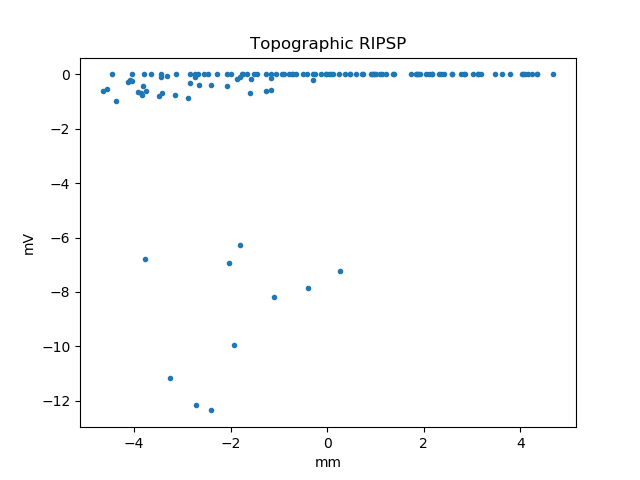

In [23]:
plt.figure()
plt.plot(distances, RIPSPs, '.')
plt.title('Topographic RIPSP')
plt.xlabel('mm')
plt.ylabel('mV')
plt.show()

In [24]:
cutoff_value = 1.0

closeidx = [x for x in range(len(distances)) if abs(distances[x])<=cutoff_value]
close_pairs = [RIPSPs[x] for x in closeidx]
distantidx = [x for x in range(len(distances)) if abs(distances[x])>cutoff_value]
distant_pairs = [RIPSPs[x] for x in distantidx]

In [25]:
RIPSP_close = np.mean(close_pairs)
RIPSP_distant = np.mean(distant_pairs)

print RIPSP_close
print RIPSP_distant

-0.509185976997459
-0.898938684387591
